In [2]:
from Net import Schrodinger_DNN
import torch
from testProblem import schrodinger_data
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import cm  
np.random.seed(123)
torch.manual_seed(123)


# 系统参数
region = [(-5,5),(0,np.pi/2)]

# 网络结构参数
width = 100
blocks = 4

# 训练参数
bc = 'fix'   # 'fix' or 'train'
beta = 1     # parameter balance loss_int and loss_partial
epochs = 11
sample_num_int = 2000
sample_num_partial = 50
show_interval = 1


model = Schrodinger_DNN(width=width,blocks=blocks,data=schrodinger_data,bc=bc)
if torch.cuda.is_available():
    model.cuda()
optimizer = torch.optim.LBFGS(
        model.parameters(),
        history_size=50,
        tolerance_change=1.0 * np.finfo(float).eps,
        line_search_fn="strong_wolfe",
    )
model.train(optimizer=optimizer,epochs=epochs,beta=beta,loss_term='int',show_interval=show_interval,sample_num_int=sample_num_int,sample_num_partial=sample_num_partial)

Trainning Start!
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 0 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=1.196   loss_int= 0.01393   loss_partial=0.2634 loss_init=0.9192
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 1 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.2098   loss_int= 0.06393   loss_partial=0.004978 loss_init=0.1409
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 2 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.1868   loss_int= 0.0804   loss_partial=0.0001144 loss_init=0.1063
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 3 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.1804   loss_int= 0.07485   loss_partial=0.0002275 loss_init=0.1054
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 4 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.1782   loss_int= 0.07616   loss_partial=2.767e-05 loss_init=0.102
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 5 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.176   loss_int= 0.07539   loss_partial=0.0001295 loss_init=0.1005
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 6 %%%%%%%%%%%%%%%%%%%%%%%%%
loss=0.1749   loss_int= 0.07728   loss_partial=0.0002091 loss_init=0.09738
%%%%%%%%%%%%%%%%%%%%%%%%% epoch 7 %%%%%%%%%%%%%%%%%%

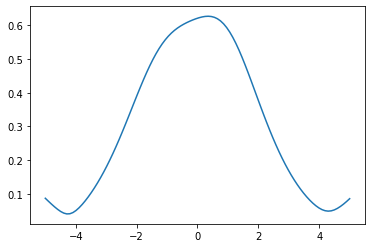

In [16]:
x = torch.linspace(-5,5,100)
t = torch.ones_like(x)*0.98
x = x.reshape(-1,1)
t = t.reshape(-1,1)
if torch.cuda.is_available():
    x = x.cuda()
    t = t.cuda()
u = model(x,t).abs()
plt.plot(x.detach(),u.detach())

In [14]:
u = np.array([[0.1370],
        [0.1333],
        [0.1295],
        [0.1259],
        [0.1224],
        [0.1194],
        [0.1169],
        [0.1152],
        [0.1146],
        [0.1153],
        [0.1174],
        [0.1210],
        [0.1263],
        [0.1332],
        [0.1417],
        [0.1518],
        [0.1637],
        [0.1777],
        [0.1942],
        [0.2137],
        [0.2368],
        [0.2641],
        [0.2956],
        [0.3309],
        [0.3692],
        [0.4089],
        [0.4483],
        [0.4861],
        [0.5210],
        [0.5520],
        [0.5779],
        [0.5979],
        [0.6108],
        [0.6159],
        [0.6150],
        [0.6109],
        [0.6066],
        [0.6043],
        [0.6035],
        [0.6012],
        [0.5933],
        [0.5750],
        [0.5444],
        [0.5100],
        [0.4859],
        [0.4757],
        [0.4727],
        [0.4718],
        [0.4725],
        [0.4752],
        [0.4780],
        [0.4799],
        [0.4833],
        [0.4917],
        [0.5071],
        [0.5288],
        [0.5542],
        [0.5788],
        [0.5998],
        [0.6169],
        [0.6305],
        [0.6410],
        [0.6486],
        [0.6510],
        [0.6418],
        [0.6194],
        [0.5913],
        [0.5620],
        [0.5306],
        [0.4951],
        [0.4552],
        [0.4131],
        [0.3727],
        [0.3373],
        [0.3077],
        [0.2826],
        [0.2600],
        [0.2388],
        [0.2187],
        [0.1996],
        [0.1819],
        [0.1662],
        [0.1535],
        [0.1440],
        [0.1375],
        [0.1328],
        [0.1288],
        [0.1249],
        [0.1206],
        [0.1163],
        [0.1122],
        [0.1089],
        [0.1067],
        [0.1061],
        [0.1071],
        [0.1098],
        [0.1143],
        [0.1204],
        [0.1279],
        [0.1367]])

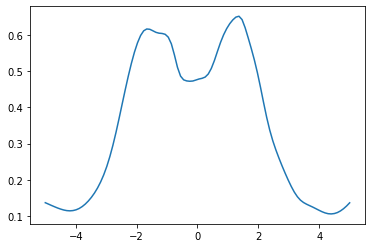

In [15]:
plt.plot(x.detach(),u)